About Dataset:

A collection of SMS composed of one text file, where each line has the correct class followed by the raw message.

Target:

To train a model to classify SMS as either ham or spam for future predictions.

In [116]:
# import all tools we need

# Regular EDA (exploratory data analysis) and plotting libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plot to inside notebook

%matplotlib inline 


# models from scikit-learn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model evaluations

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [117]:
df = pd.read_csv("data/spam.csv", encoding='latin-1')
#https://stackoverflow.com/questions/5552555/unicodedecodeerror-invalid-continuation-byte
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""",GE,"GNT:-)"""
freq,4825,30,3,2,2


In [118]:
# is any missing values?
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [119]:
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [120]:
df = df.rename(columns  = {'v1':'name','v2':'message'} )

In [121]:
df.groupby('name').describe()

message                                                               
       count unique                                                top freq
name                                                                       
ham     4825   4516                             Sorry, I'll call later   30
spam     747    653  Please call our customer service representativ...    4

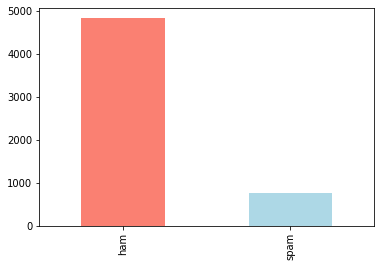

In [122]:
df["name"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);
#ham has more messages in the data set as per below plot

In [123]:
from collections import Counter
#we are using to find frequencies of words

In [124]:
count1 = Counter(" ".join(df[df['name']=='ham']["message"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in non-spam", 1 : "count"})
count2 = Counter(" ".join(df[df['name']=='spam']["message"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count_"})

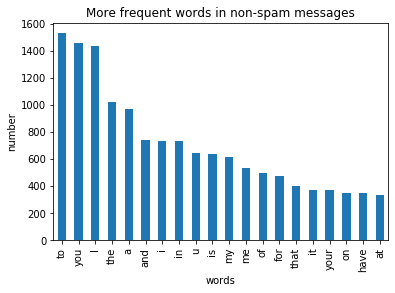

In [125]:
df1.plot.bar(legend = False)
y_pos = np.arange(len(df1["words in non-spam"]))
plt.xticks(y_pos, df1["words in non-spam"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

In [126]:
import string
#now to remove punctuation
def remove_punctuation(message):
    message=''.join([char for char in message if char not in string.punctuation])
    return message

In [127]:
df["message"]=df["message"].apply(lambda row : remove_punctuation(row))

In [128]:
df.head()

,name,message
0,ham,Go until jurong point crazy Available only in ...
1,ham,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor U c already then say
4,ham,Nah I dont think he goes to usf he lives aroun...


In [129]:
#to remove stopwords
from sklearn import feature_extraction
#https://scikit-learn.org/stable/modules/feature_extraction.html

In [130]:
f = feature_extraction.text.TfidfVectorizer(stop_words = 'english')
X = f.fit_transform(df["message"])
np.shape(X)

(5572, 9222)

In [131]:
df.head()

,name,message
0,ham,Go until jurong point crazy Available only in ...
1,ham,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor U c already then say
4,ham,Nah I dont think he goes to usf he lives aroun...


In [132]:
df["name"]=df["name"].map({'spam':1,'ham':0})
df.head()

,name,message
0,0,Go until jurong point crazy Available only in ...
1,0,Ok lar Joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor U c already then say
4,0,Nah I dont think he goes to usf he lives aroun...


In [133]:
# split data into train and test
np.random.seed(42)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, df['name'], test_size=0.33, random_state=42)

In [136]:
# models from scikit-learn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# put models in dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN" : KNeighborsClassifier(),
         "Random Forest" : RandomForestClassifier()}

#create a function t fit and score model

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # set random seed
    np.random.seed(42)
    #make a dict to keep model score
    model_scores ={}
    #loop through models
    for name, model in models.items():
        #fit the model to data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [137]:
model_scores = fit_and_score(models = models,
                            X_train = X_train,
                            X_test = X_test,
                            y_train = y_train,
                            y_test = y_test)

model_scores

{'Logistic Regression': 0.9352909189777052,
 'KNN': 0.8977705274605764,
 'Random Forest': 0.9760739532354541}

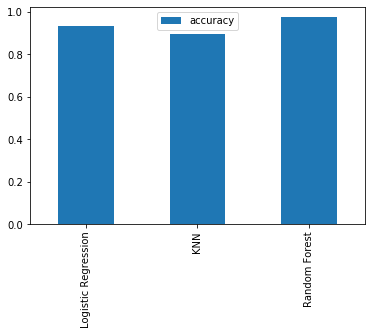

In [138]:
model_comparison = pd.DataFrame(model_scores, index=["accuracy"])
model_comparison.T.plot.bar()

In [142]:
#create a hyperparameter grid for RandomForestClassifier

rf_grid ={"n_estimators" : np.arange(10, 1000, 50),
          "max_depth" : [None, 3, 5, 10],
         "min_samples_split": np.arange(2, 20, 2),
         "min_samples_leaf" : np.arange(2, 20, 2)}

# setup random seed

np.random.seed(42)

#setup random hyper parameter search for forestclassifier

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=rf_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# fit random hyperparameter search model for RandomForestClassifier()

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  4.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [143]:
rs_rf.score(X_test, y_test)

0.9717237629146275

In [144]:
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 2,
 'max_depth': None}

In [146]:
# make predictions with tuned model

y_preds = rs_rf.predict(X_test)
print(y_preds)

[0 0 0 ... 0 0 1]


In [147]:
all_predictions=rs_rf.predict(X_test)
print(all_predictions)

[0 0 0 ... 0 0 1]


In [149]:
print(y_test)

3245    0
944     0
1044    1
2484    0
812     1
       ..
4944    0
3313    0
3652    0
14      0
4758    1
Name: name, Length: 1839, dtype: int64


In [150]:
# confusion matrix

print(confusion_matrix(y_test, y_preds))

[[1584    3]
 [  49  203]]


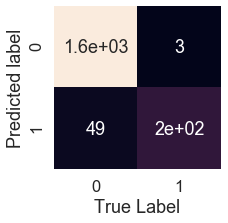

In [151]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plot nice looking confusion matrix using seaborn heatmap
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(y_test, y_preds)